In [158]:
#Load main libraries
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport 
import scipy as sp
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pycaret as pyc
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import re

#Import visual libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import time series analysis libraries
import pmdarima as pmd
import sktime as skt


In [170]:
#Read in the data
test = pd.read_csv(r"C:\Users\tammm\OneDrive\Desktop\portfolio project data\titanic_test.csv")
train = pd.read_csv(r"C:\Users\tammm\OneDrive\Desktop\portfolio project data\titanic_train.csv")



In [171]:
report_train = ProfileReport(train)
report_train

In [172]:
report_test = ProfileReport(test)
report_test

In [173]:
#Combine train and test for EDA and visuals
full_data=[train, test]


In [174]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [175]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [176]:
train_tmp = train.copy()
test_tmp = test.copy()
train_tmp['type'] = 'train'
train_tmp.drop('Survived', axis = 1, inplace = True)
test_tmp['type'] = 'test'
data = pd.concat([train_tmp, test_tmp], ignore_index = True)

dfplot = data.groupby(['type','Pclass']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['Pclass'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['Pclass'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="Pclass")
fig.show()

In [177]:
dfplot = data.groupby(['type','Sex']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['Sex'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['Sex'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="Sex")
fig.show()

In [178]:
dfplot = data.groupby(['type','SibSp']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['SibSp'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['SibSp'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="SibSp")
fig.show()

In [179]:
dfplot = data.groupby(['type','Embarked']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['Embarked'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['Embarked'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="Embarked")
fig.show()

In [180]:
fig = px.violin(train, y="Age", x="Survived", color="Sex", box=True, points="all", hover_data=['Age', 'Survived', 'Sex'])
fig.show()

In [181]:
fig = px.violin(train, y="Fare", x="Survived", color="Sex", box=True, points="all", hover_data=['Fare', 'Survived', 'Sex'])
fig.show()

In [182]:
NoSurvived = len(train[train.Survived == 0])
Survived = len(train[train.Survived == 1])

print("Percentage of passengers who didn't survive: {:.2f}%".format((NoSurvived / (len(train.Survived))*100)))
print("Percentage of passengers who survived: {:.2f}%".format((Survived / (len(train.Survived))*100)))

Percentage of passengers who didn't survive: 61.62%
Percentage of passengers who survived: 38.38%


In [183]:
# Correlation Matrix

corr_matrix = train.corr()
corr_matrix

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [186]:
#setup classification 
from pycaret.classification import * 

#intialize the setup 
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True,
             remove_outliers = True,
             normalize = True)

Setup Succesfully Completed!


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                      display_types=False,
                                      features_todrop=['Name', 'Ticket',
                                                       'Cabin'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable...
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()),
                ('rem_outliers',
                 Ou

In [187]:
# return top 3 models based on 'AUC'
compare_models(sort='AUC')

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x0000018C7C85B040>
INFO:logs:compare_models() succesfully completed......................................


In [188]:
# check the model library to see all models
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                            Reference  Turbo  
ID                                                            
lr            sklearn.linear_model.LogisticRegression   True  
knn            sklearn.neighbors.KNeighborsClassifier   True  
nb                     sklearn.naive_bayes.GaussianNB   True  
dt                sklearn.tree.DecisionTreeClassifier   True  
svm                sklearn.linear_model.SGDClassifier   True  
rbfsvm                                sklearn.svm.SVC  False  
gpc                      sklearn.gaussian_process.GPC  False  
mlp              sklearn.neural_network.MLPClassifier  False  
ridge            sklearn.linear_model.RidgeClassifier   True  
rf            sklearn.ensemble.RandomForestClassifier   True  
qda                 sklearn.discriminant_analysis.QDA   True  
ada               sklearn.ensemble.AdaBoostClassifier   True  
gbc       sklearn.ensemble.GradientBoostingClassifier   True  
lda                 sklearn.discriminant_analysis.LDA   True  
et              sklearn.ensemble.ExtraTreesClassifier   True  
xgboost                        xgboost.readthedocs.io   True  
lightgbm                github.com/microsoft/LightGBM   True  
catboost                                  catboost.ai   True

In [189]:
#Create GBC model
gbc = create_model('gbc')

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3146, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [190]:
#Tune to improve model performance
tuned_gbc = tune_model(gbc, optimize = 'AUC')

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=70,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3146, subsample=0.40000000000000013,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


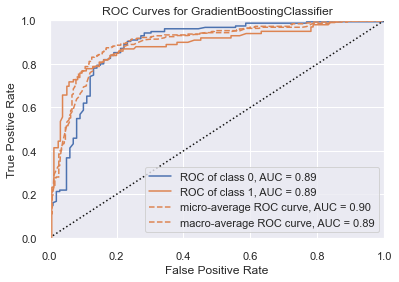

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [191]:
plot_model(estimator = gbc, plot = 'auc')

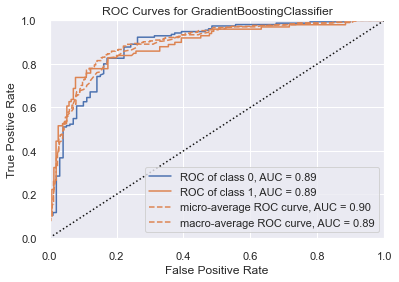

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [192]:
plot_model(estimator = tuned_gbc, plot = 'auc')

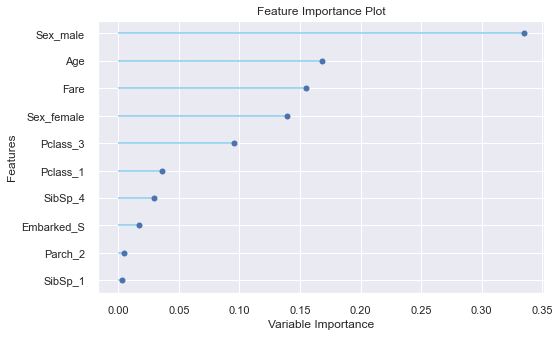

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [193]:
plot_model(estimator = gbc, plot = 'feature')

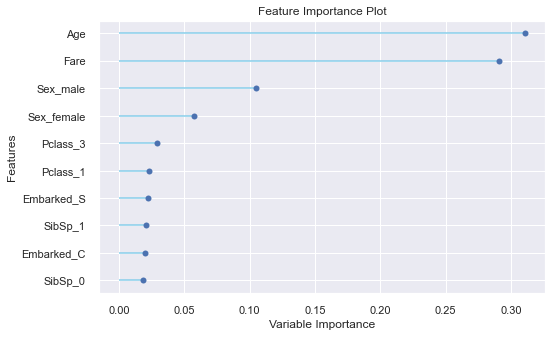

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [194]:
plot_model(estimator = tuned_gbc, plot = 'feature')

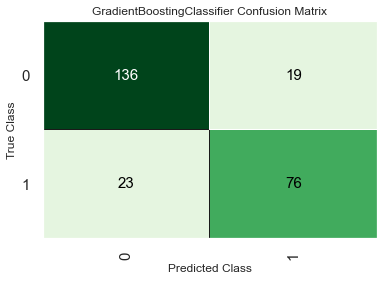

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [195]:
#Plot confusion matrix to visualise how well this model predicts the train data
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

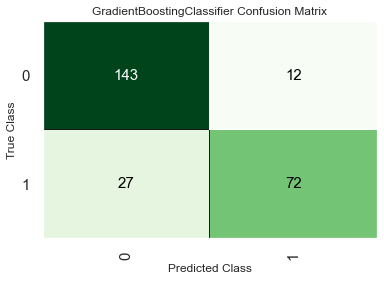

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [196]:
#How does this compare with the un-tuned model?
plot_model(estimator = gbc, plot = 'confusion_matrix')

In [197]:
#Repeat model creation and tuning for catboost to see how it compares

cat = create_model('catboost')

INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:<catboost.core.CatBoostClassifier object at 0x0000018C0327E6D0>
INFO:logs:create_model() succesfully completed......................................


In [198]:
#Tune to improve model performance
tuned_cat = tune_model(cat, optimize = 'AUC')

INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:<catboost.core.CatBoostClassifier object at 0x0000018C05C77FD0>
INFO:logs:tune_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x0000018C05C77FD0>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


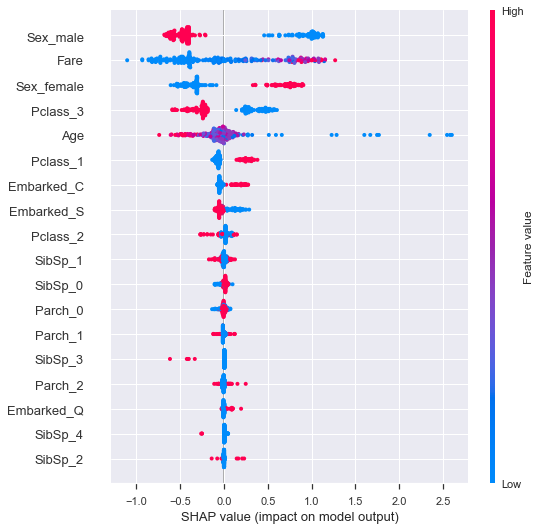

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [199]:
# interpreting model
interpret_model(tuned_cat)

In [201]:
#Repeat model creation and tuning for lda to see how it compares

lda = create_model('lda')

INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 7
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [202]:
tuned_lda=tune_model(lda, optimize = 'AUC')

INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 8
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.2,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


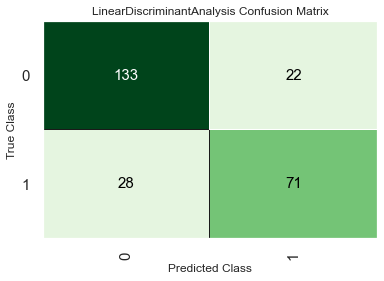

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [203]:
plot_model(estimator = tuned_lda, plot = 'confusion_matrix')

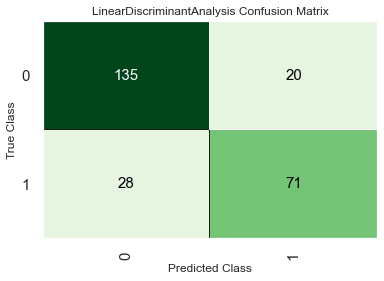

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [204]:
plot_model(estimator = lda, plot = 'confusion_matrix')

In [208]:
#Create light gradient boosting model
lgbm  = create_model('lightgbm') 

INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 9
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3146, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [212]:
#Tune LGBM model
tuned_lgbm=tune_model(lgbm, optimize = 'AUC')


INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 10
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=50, n_jobs=-1, num_leaves=40, objective=None,
               random_state=3146, reg_alpha=0.9, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


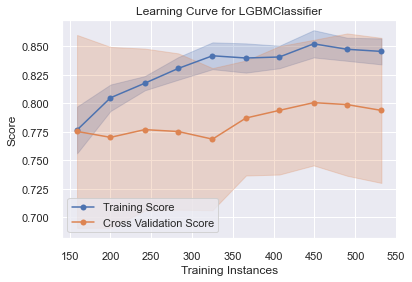

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [213]:
plot_model(estimator = tuned_lgbm, plot = 'learning')

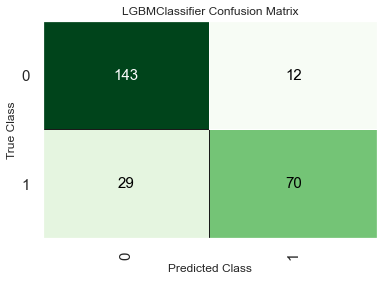

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [214]:
plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')

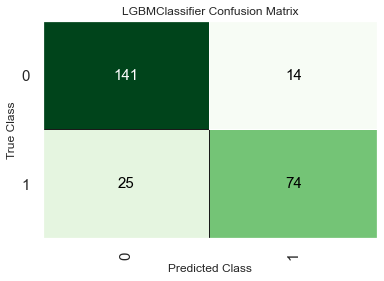

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [215]:
#Compare with untuned model
plot_model(estimator = lgbm, plot = 'confusion_matrix')

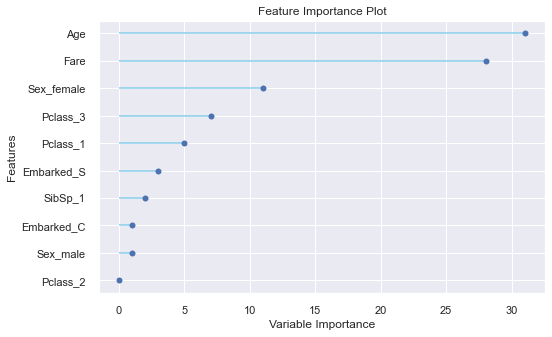

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [218]:
plot_model(estimator = tuned_lgbm, plot = 'feature')

In [219]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=50, n_jobs=-1, num_leaves=40, objective=None,
               random_state=3146, reg_alpha=0.9, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


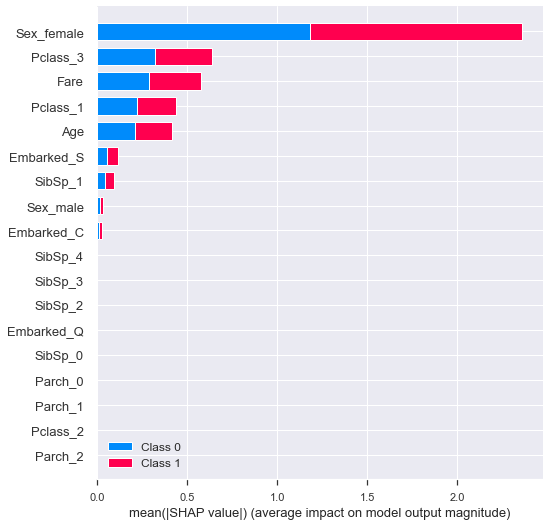

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [220]:
interpret_model(tuned_lgbm)

In [216]:
#The tuned LGBM model appears to be the most suited to the data, so move on to predictions
predictions = predict_model(tuned_lgbm, data=test)
predictions.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Label   Score  
0  34.5      0      0   330911   7.8292   NaN        Q      0  0.0985  
1  47.0      1      0   363272   7.0000   NaN        S      0  0.4395  
2  62.0      0      0   240276   9.6875   NaN        Q      0  0.1210  
3  27.0      0      0   315154   8.6625   NaN        S      0  0.1519  
4  22.0      1      1  3101298  12.2875   NaN        S      0  0.4290

In [217]:
predictions

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0              330911    7.8292   NaN        Q   
1    female  47.0      1      0              363272    7.0000   NaN        S   
2      male  62.0      0      0              240276    9.6875   NaN        Q   
3      male  27.0      0      0              315154    8.6625   NaN        S   
4    female  22.0      1      1             3101298   12.2875   NaN        S   
..      ...   ...    ...    ...                 ...       ...   ...      ...   
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  female  39.0      0      0            PC 17758  108.9000  C105        C   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416    male   NaN      0      0              359309    8.0500   NaN        S   
417    male   NaN      1      1                2668   22.3583   NaN        C   

     Label   Score  
0        0  0.0985  
1        0  0.4395  
2        0  0.1210  
3        0  0.1519  
4        0  0.4290  
..     ...     ...  
413      0  0.1519  
414      1  0.9564  
415      0  0.0631  
416      0  0.1519  
417      0  0.1285  

[418 rows x 13 columns]

In [223]:
#Finalise the model

final_lgbm = finalize_model(tuned_lgbm)

INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 11
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=50, n_jobs=-1, num_leaves=40, objective=None,
               random_state=3146, reg_alpha=0.9, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:finalize_model() succesfully completed......................................
